# 1. MSPRT applied to three symmetric qubits

This notebook corresponds to the MSPRT applyied for three symmetric qubits. 

Cells 1-3 define the needed parameters.

Cell 4 computes a single sequential test for a fixed purity, theta and error.

Cell 5 computes a loop of sequential tests with fixed purity, theta and error and prints the average n, the error ratio and the maximum value of n achieved by a single test.

Cell 6 and 7 compute a loops of sequential tests for diferent values of theta. Plots of the average n vs theta for three different error and purities are provided, respectively.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Rotacio(omega,vector):
    a = np.cos(omega)*vector[0]-np.sin(omega)*vector[1] 
    b = np.sin(omega)*vector[0]+np.cos(omega)*vector[1]
    return np.array((a,b))

def probabilitats(rho,pi,i):
    A = np.zeros(len(pi))
    for k in range(len(pi)):
        A[k] = np.trace(np.dot(pi[k],rho[i]))
    return abs(A)

def likelihood_ratio(tirs,prob_matrix,priors):
    a,b,c = priors[0],priors[1],priors[2]
    # prob_matrix[0].shape[1] és el nombre de outputs
    for k in range(prob_matrix[0].shape[1]):
        a *=  prob_matrix[0,k]**tirs[k]
        b *=  prob_matrix[1,k]**tirs[k]
        c *=  prob_matrix[2,k]**tirs[k]
    return np.array((a/(a+b+c),b/(a+b+c), c/(a+b+c)))

In [3]:
alpha = 0.00001 #Error bound

prior0= 1/3
prior1 = 1/3
prior2 = 1/3
priors = [prior0,prior1,prior2]
r0 = 1
r1 = 1
r2 = 1
r = [r0,r1,r2]
#r = np.repeat(0.9,3)

psi0 = np.array((1,0))
psi1 = Rotacio(np.pi/3,psi0)
psi2 = Rotacio(2*np.pi/3,psi0)
rho0 = r[0]*np.tensordot(psi0,psi0,axes = 0)+(1-r[0])*np.identity(2)/2
rho1 = r[1]*np.tensordot(psi1,psi1,axes = 0)+(1-r[1])*np.identity(2)/2
rho2 = r[2]*np.tensordot(psi2,psi2,axes = 0)+(1-r[2])*np.identity(2)/2
rho = [rho0,rho1,rho2]

#symmetric POVM
theta = np.pi/2
psitheta0 = np.array((np.cos(theta/2), np.sin(theta/2)))
psitheta1 = Rotacio(2*np.pi/3,psitheta0)
psitheta2 = Rotacio(4*np.pi/3,psitheta0)
pi0 = (2/3)*np.tensordot(psitheta0,psitheta0,axes=0)
pi1 = (2/3)*np.tensordot(psitheta1,psitheta1,axes=0)
pi2 = (2/3)*np.tensordot(psitheta2,psitheta2,axes=0)
pi = [pi0,pi1,pi2]

prob_matrix = np.matrix([probabilitats(rho,pi,0),probabilitats(rho,pi,1),probabilitats(rho,pi,2)])


In [4]:
#UN SOL SEQUENTIAL TEST

estat = 0
#estat = np.random.randint(0,3)

m = 0
output = 0
tirs = np.zeros(len(pi))
tirades=[]

while m >= 0:
    output =  np.random.choice(len(pi), p = probabilitats(rho,pi,estat))
    tirades.append(output)
    tirs[output] += 1

    n = m

    for i in range(3):
        if likelihood_ratio(tirs,prob_matrix,priors)[i]>=1-alpha:
            print('n = '+str(n))
            print("State: "+str(i))
            m = -10
    m+=1
print(tirades)

n = 13
State: 0
[0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1]


In [5]:
#PER UN THETA DONAT ET DONA EL VALOR PROMIG DE N JUNTAMENT AMB L'ERROR
errors = 0
n_tirades = []	
loops = 10000
for i in range (loops):
    estat = np.random.randint(0,3)
    m = 1
    output = 0
    tirs = np.zeros(len(pi))

    tirades=[0]
    while m >= 0:
        output =  np.random.choice(len(pi), p = probabilitats(rho,pi,estat))
        tirades.append(output)
        tirs[output] += 1
    
        n = m
    
        for i in range(3):
            if likelihood_ratio(tirs,prob_matrix,priors)[i]>=1-alpha:
                m = -10
                if i != estat:
                    errors += 1
        m+=1
    
    n_tirades.append(n)
print("Error ratio: ", errors/loops)
print("Average n: ", np.sum(n_tirades) /loops)
print("max n: ", np.max(n_tirades))

Error ratio:  0.0
Average n:  14.1147
max n:  43


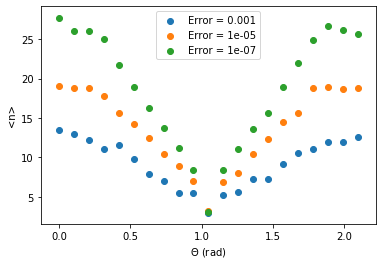

In [6]:
#<n> vs theta per diferents errors
particions = 21
loops = 100
alphav = [0.001,0.00001,0.0000001]
n_promig0 = np.zeros(particions)
n_promig1 = np.zeros(particions)
n_promig2 = np.zeros(particions)
theta = np.linspace(0,2*np.pi/3,particions)
txt0 = np.zeros((particions,2))
txt1 = np.zeros((particions,2))
txt2 = np.zeros((particions,2))
for k in range(particions): 
    #print(k)
    
    psi0 = np.array((1,0))
    psi1 = Rotacio(np.pi/3,psi0)
    psi2 = Rotacio(2*np.pi/3,psi0)
    rho0 = r[0]*np.tensordot(psi0,psi0,axes = 0)+(1-r[0])*np.identity(2)/2
    rho1 = r[1]*np.tensordot(psi1,psi1,axes = 0)+(1-r[1])*np.identity(2)/2
    rho2 = r[2]*np.tensordot(psi2,psi2,axes = 0)+(1-r[2])*np.identity(2)/2
    rho = [rho0,rho1,rho2]
    
    psitheta0 = np.array((np.cos(theta[k]/2), np.sin(theta[k]/2)))
    psitheta1 = Rotacio(2*np.pi/3,psitheta0)
    psitheta2 = Rotacio(4*np.pi/3,psitheta0)
    pi0 = (2/3)*np.tensordot(psitheta0,psitheta0,axes=0)
    pi1 = (2/3)*np.tensordot(psitheta1,psitheta1,axes=0)
    pi2 = (2/3)*np.tensordot(psitheta2,psitheta2,axes=0)
    pi = [pi0,pi1,pi2]
    
    prob_matrix = np.matrix([probabilitats(rho,pi,0),probabilitats(rho,pi,1),probabilitats(rho,pi,2)])
    
    errors = 0
    n_tirades0 = []
    n_tirades1 = []
    n_tirades2 = []
    
    for o in range(3):
        for i in range (loops):
            estat = np.random.choice(3, p=priors)
            m = 1
            output = 0
            tirs = np.zeros(len(pi))

            tirades=[0]
            while m >= 0:
                output =  np.random.choice(len(pi), p = probabilitats(rho,pi,estat))
                tirades.append(output)
                tirs[output] += 1

                n = m

                for i in range(3):
                    if likelihood_ratio(tirs,prob_matrix,priors)[i]>=1-alphav[o]:
                        m = -10
                        if i != estat:
                            errors += 1
                m+=1
                #print(tirades)
            if o ==0:
                n_tirades0.append(n)
            elif o==1: 
                n_tirades1.append(n)
            else:
                n_tirades2.append(n)
                                        
    n_promig0[k] = np.sum(n_tirades0) /loops
    n_promig1[k] = np.sum(n_tirades1) /loops
    n_promig2[k] = np.sum(n_tirades2) /loops
    txt0[k,0] = theta[k]
    txt0[k,1] = n_promig0[k]
    txt1[k,0] = theta[k]
    txt1[k,1] = n_promig1[k]
    txt2[k,0] = theta[k]
    txt2[k,1] = n_promig2[k]

#np.savetxt("nvstheta0.txt",txt0)
#np.savetxt("nvstheta1.txt",txt1)
#np.savetxt("nvstheta2.txt",txt2)

fig, ax = plt.subplots()
ax.scatter(theta,n_promig0, label= "Error = "+str(alphav[0]))
ax.scatter(theta,n_promig1, label= "Error = "+str(alphav[1]))
ax.scatter(theta,n_promig2, label= "Error = "+str(alphav[2]))
ax.set_xlabel(r"$\Theta$ (rad)")
ax.set_ylabel("<n>")
ax.legend()
plt.show()

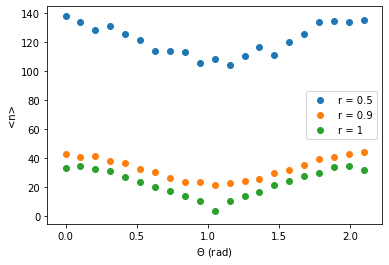

In [7]:
#<n> vs theta for different errors
particions = 21
loops = 100
ri = [0.5,0.9,1]
alpha = 0.000000001
n_promig0 = np.zeros(particions)
n_promig1 = np.zeros(particions)
n_promig2 = np.zeros(particions)
theta = np.linspace(0,2*np.pi/3,particions)
txt0 = np.zeros((particions,2))
txt1 = np.zeros((particions,2))
txt2 = np.zeros((particions,2))
for k in range(particions): 
    #print(k)
    
    psitheta0 = np.array((np.cos(theta[k]/2), np.sin(theta[k]/2)))
    psitheta1 = Rotacio(2*np.pi/3,psitheta0)
    psitheta2 = Rotacio(4*np.pi/3,psitheta0)
    pi0 = (2/3)*np.tensordot(psitheta0,psitheta0,axes=0)
    pi1 = (2/3)*np.tensordot(psitheta1,psitheta1,axes=0)
    pi2 = (2/3)*np.tensordot(psitheta2,psitheta2,axes=0)
    pi = [pi0,pi1,pi2]
    
    errors = 0
    n_tirades0 = []
    n_tirades1 = []
    n_tirades2 = []
    
    for o in range(3):
        r = np.repeat(ri[o],3)
        psi0 = np.array((1,0))
        psi1 = Rotacio(np.pi/3,psi0)
        psi2 = Rotacio(2*np.pi/3,psi0)
        rho0 = r[0]*np.tensordot(psi0,psi0,axes = 0)+(1-r[0])*np.identity(2)/2
        rho1 = r[1]*np.tensordot(psi1,psi1,axes = 0)+(1-r[1])*np.identity(2)/2
        rho2 = r[2]*np.tensordot(psi2,psi2,axes = 0)+(1-r[2])*np.identity(2)/2
        rho = [rho0,rho1,rho2]
        prob_matrix = np.matrix([probabilitats(rho,pi,0),probabilitats(rho,pi,1),probabilitats(rho,pi,2)])
        for i in range (loops):
            estat = np.random.choice(3, p=priors)
            m = 1
            output = 0
            tirs = np.zeros(len(pi))

            tirades=[0]
            while m >= 0:
                output =  np.random.choice(len(pi), p = probabilitats(rho,pi,estat))
                tirades.append(output)
                tirs[output] += 1

                n = m

                for i in range(3):
                    if likelihood_ratio(tirs,prob_matrix,priors)[i]>=1-alpha:
                        m = -10
                        if i != estat:
                            errors += 1
                m+=1
            if o ==0:
                n_tirades0.append(n)
            elif o==1: 
                n_tirades1.append(n)
            else:
                n_tirades2.append(n)
                                        
    n_promig0[k] = np.sum(n_tirades0) /loops
    n_promig1[k] = np.sum(n_tirades1) /loops
    n_promig2[k] = np.sum(n_tirades2) /loops
    txt0[k,0] = theta[k]
    txt0[k,1] = n_promig0[k]
    txt1[k,0] = theta[k]
    txt1[k,1] = n_promig1[k]
    txt2[k,0] = theta[k]
    txt2[k,1] = n_promig2[k]

#np.savetxt("nvstheta0.txt",txt0)
#np.savetxt("nvstheta1.txt",txt1)
#np.savetxt("nvstheta2.txt",txt2)

fig, ax = plt.subplots()
ax.scatter(theta,n_promig0, label= "r = "+str(ri[0]))
ax.scatter(theta,n_promig1, label= "r = "+str(ri[1]))
ax.scatter(theta,n_promig2, label= "r = "+str(ri[2]))
ax.set_xlabel(r"$\Theta$ (rad)")
ax.set_ylabel("<n>")
ax.legend()
plt.show()